# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)

Setup

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count

,hour_of_day,0,1,2,3,4,5,6
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


In [163]:
day_hour_count_drop = day_hour_count.dropna()
day_hour_count_drop

,hour_of_day,0,1,2,3,4,5,6
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


In [164]:
monday = day_hour_count_drop[["hour_of_day","0"]].copy()
monday["hour"] = monday.index
monday

,hour_of_day,0,hour
0,0.0,21.0,0
1,0.1,39.0,1
2,0.2,31.0,2
3,0.3,26.0,3
4,0.4,19.0,4
...,...,...,...
235,23.5,36.0,235
236,23.6,37.0,236
237,23.7,30.0,237
238,23.8,33.0,238


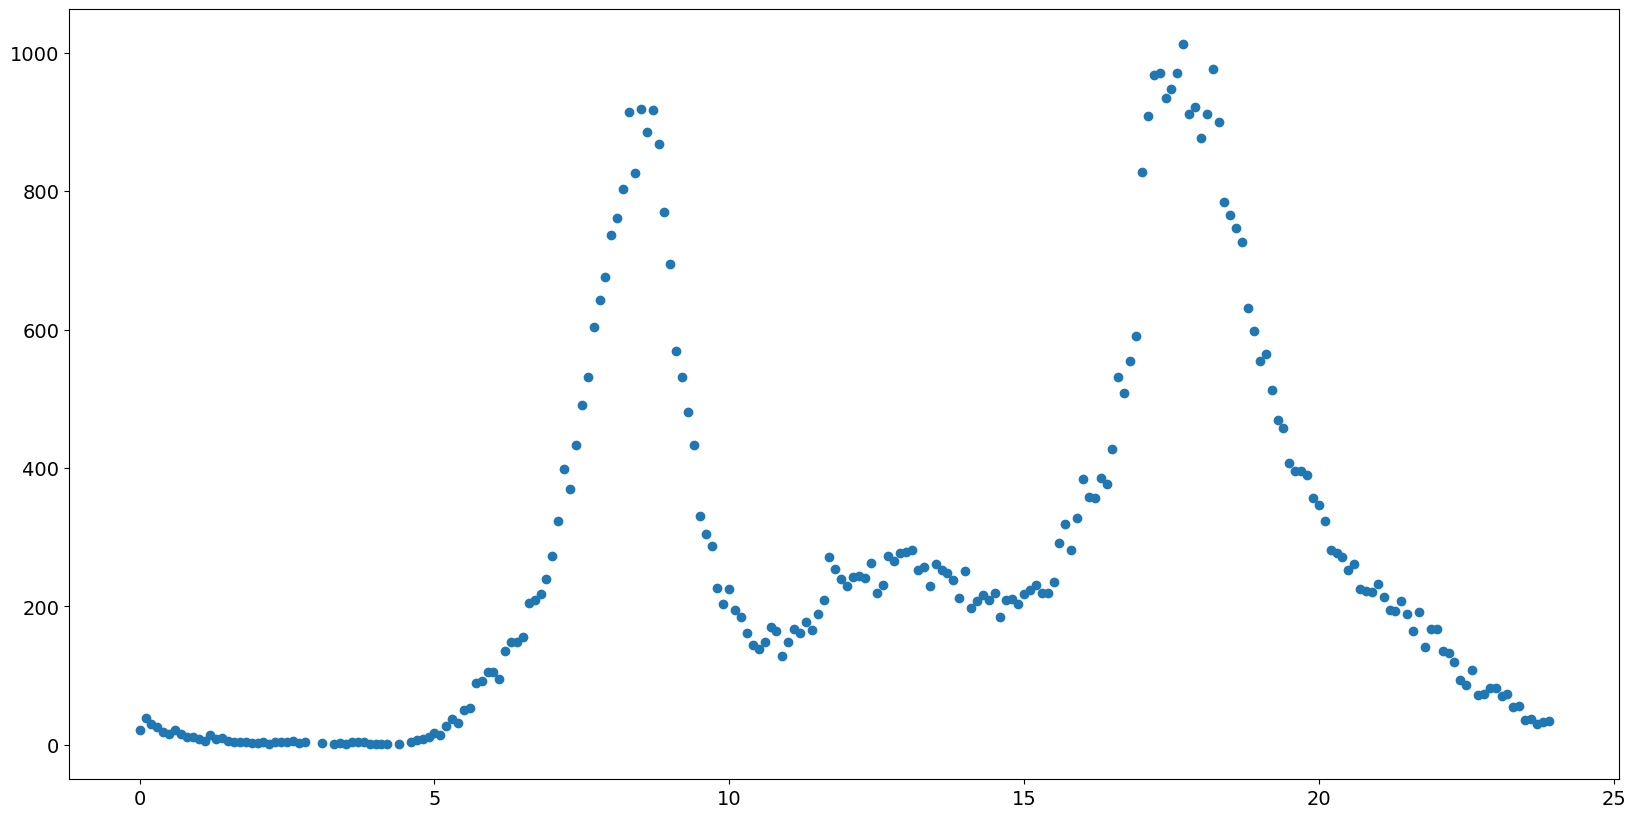

In [165]:
x_mon = monday["hour_of_day"].values.reshape(-1,1)
y_mon = monday["0"]
plt.scatter(x_mon, y_mon)

In [166]:
model = LinearRegression()
model.fit(x_mon, y_mon)

LinearRegression()

In [167]:
model.coef_, model.intercept_

(array([12.67240265]), 125.09525619708384)

In [168]:
from sklearn.preprocessing import PolynomialFeatures

poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mon)

In [169]:
model_poly = LinearRegression()
model_poly.fit(x_15, y_mon)
model_poly.coef_, model_poly.intercept_

(array([ 0.00000000e+00,  1.54736655e-05,  7.42928578e-08,  9.14147263e-07,
         5.78926997e-06,  3.21956700e-05,  1.49223079e-04,  5.14125523e-04,
         9.56456144e-04, -3.93293881e-04,  6.34693567e-05, -5.53175693e-06,
         2.84572749e-07, -8.67949237e-09,  1.45668064e-10, -1.03934004e-12]),
 22.14972588863776)

In [170]:
ridge_poly = linear_model.Ridge(alpha=15)
ridge_poly.fit(x_15, y_mon)

(ridge_poly.coef_, ridge_poly.intercept_)

(array([ 0.00000000e+00,  1.80096514e-02, -7.44022843e+00,  6.07398987e+01,
         4.71785060e+01, -7.67787993e+01,  3.59489547e+01, -8.97755235e+00,
         1.39911158e+00, -1.45561424e-01,  1.04152442e-02, -5.15588933e-04,
         1.73769583e-05, -3.80928418e-07,  4.90035657e-09, -2.80825479e-11]),
 17.151186679271916)

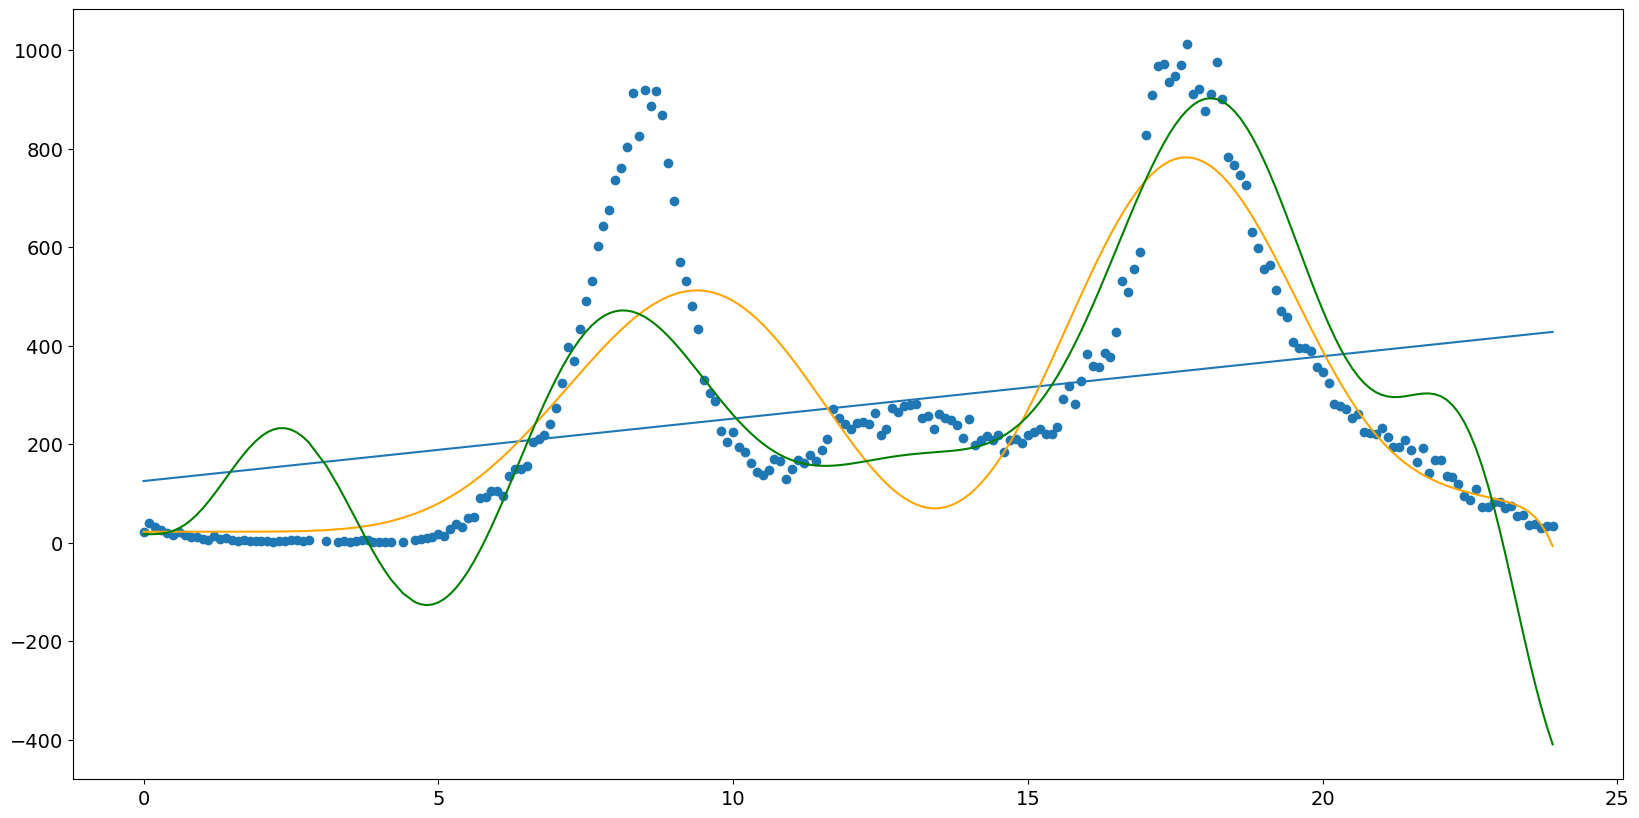

In [171]:
plt.scatter(x_mon,y_mon)
plt.plot(x_mon, np.dot(x_mon, model.coef_) + model.intercept_)
plt.plot(x_mon, np.dot(x_15, model_poly.coef_.T) + model_poly.intercept_, c="orange")
plt.plot(x_mon, np.dot(x_15, ridge_poly.coef_) + ridge_poly.intercept_, c="green")

Split

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [173]:
x_mtrain, x_mtest, y_mtrain, y_mtest = train_test_split(x_mon, y_mon, test_size=.5)

In [175]:
model = LinearRegression()
model.fit(x_mtrain, y_mtrain)
model.coef_, model.intercept_

(array([15.27649333]), 102.11108707841996)

In [176]:
mean_squared_error(y_mtrain, np.dot(x_mtrain, model.coef_) + model.intercept_)

65047.63986171688

In [177]:
mean_absolute_error(y_mtrain, np.dot(x_mtrain, model.coef_) + model.intercept_)

186.9753007071962

In [178]:
mean_squared_error(y_mtest, np.dot(x_mtest, model.coef_) + model.intercept_)

66619.58273524817

In [179]:
mean_absolute_error(y_mtest, np.dot(x_mtest, model.coef_) + model.intercept_)

199.252912589126

In [180]:
from sklearn.preprocessing import PolynomialFeatures

poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mtrain)

In [181]:
model_poly = LinearRegression()
model_poly.fit(x_15, y_mtrain)
model_poly.coef_, model_poly.intercept_

(array([ 0.00000000e+00, -1.64624132e-05,  1.02388619e-07,  8.59282985e-07,
         5.45666648e-06,  3.03837317e-05,  1.40832209e-04,  4.84741199e-04,
         9.00129896e-04, -3.68856396e-04,  5.93275678e-05, -5.15391528e-06,
         2.64294813e-07, -8.03647330e-09,  1.34487798e-10, -9.57000378e-13]),
 25.657165696478273)

In [182]:
mean_squared_error(y_mtrain, np.dot(x_15, model_poly.coef_) + model_poly.intercept_)

22000.29603763512

In [183]:
mean_absolute_error(y_mtrain, np.dot(x_15, model_poly.coef_) + model_poly.intercept_)

109.42142689380127

In [184]:
x_15 = poly15.fit_transform(x_mtest)

In [185]:
model_poly.fit(x_15, y_mtest)
model_poly.coef_, model_poly.intercept_

(array([ 0.00000000e+00,  1.90836697e-06,  1.12804904e-07,  9.95713271e-07,
         6.26120833e-06,  3.46149071e-05,  1.59647386e-04,  5.47775410e-04,
         1.01521529e-03, -4.19616237e-04,  6.80327574e-05, -5.95679841e-06,
         3.07852308e-07, -9.43294885e-09,  1.59045182e-10, -1.14000642e-12]),
 17.914672687902282)

In [186]:
mean_squared_error(y_mtest, np.dot(x_15, model_poly.coef_) + model_poly.intercept_)

17045.160339244463

In [187]:
mean_absolute_error(y_mtest, np.dot(x_15, model_poly.coef_) + model_poly.intercept_)

88.16230969747315

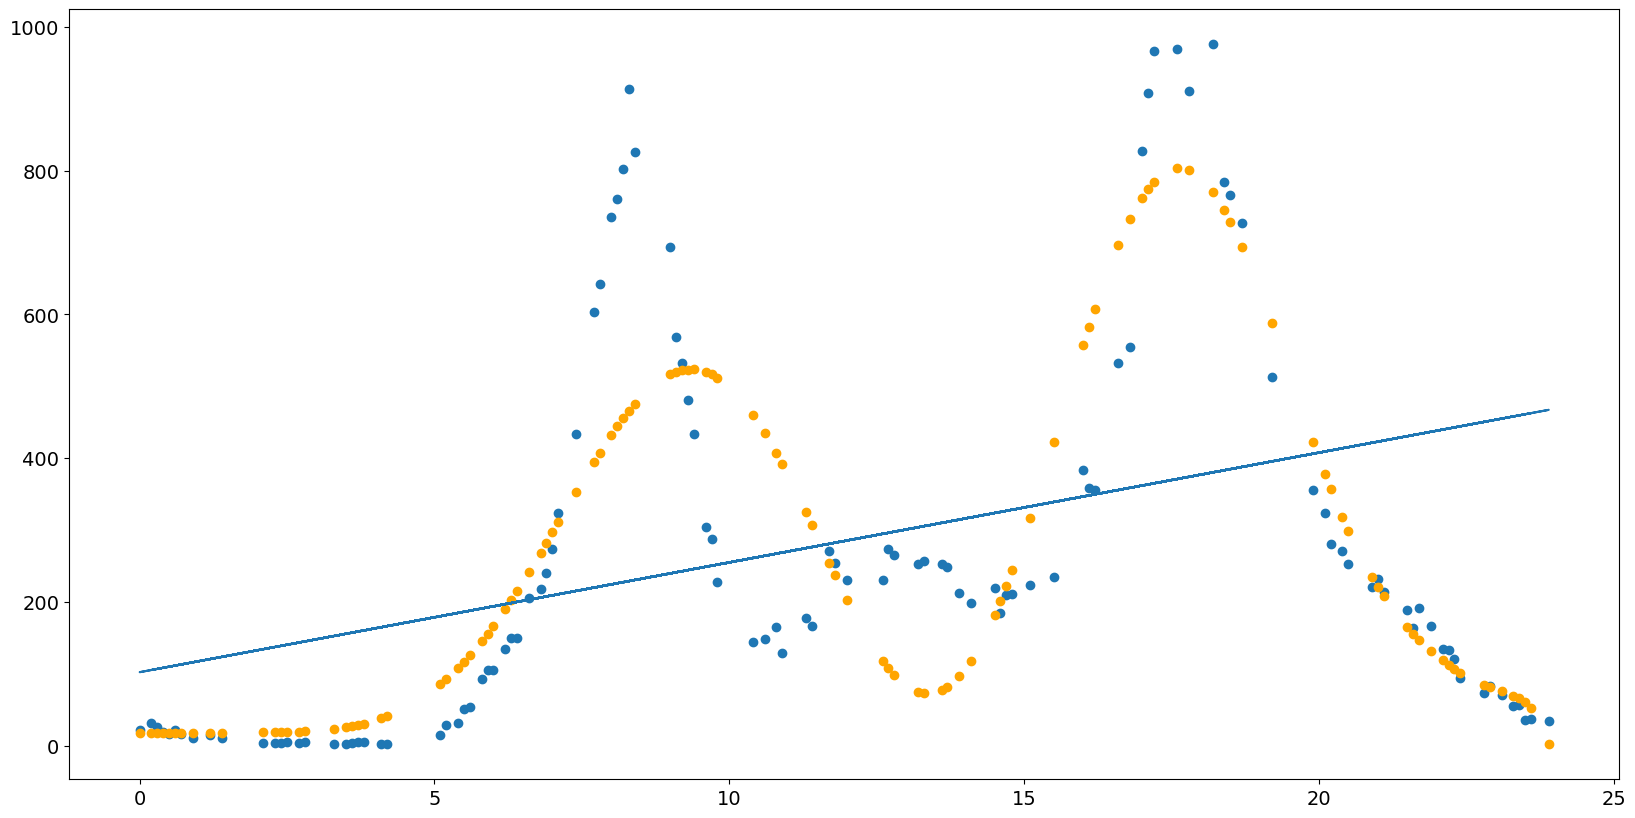

In [188]:
plt.scatter(x_mtest,y_mtest)
plt.plot(x_mtest, np.dot(x_mtest, model.coef_) + model.intercept_)
plt.scatter(x_mtest, np.dot(x_15, model_poly.coef_.T) + model_poly.intercept_, c="orange")

Ridge

In [189]:
from sklearn.linear_model import Ridge

In [190]:
x_15 = poly15.fit_transform(x_mtrain)

In [191]:
ridge_poly = linear_model.Ridge(alpha=15)
ridge_poly.fit(x_15, y_mtrain)
(ridge_poly.coef_, ridge_poly.intercept_)

(array([ 0.00000000e+00, -2.77220451e-01, -2.97069841e+01,  2.46450201e+01,
         1.39141560e+01, -4.66300317e+01,  2.56429314e+01, -6.90335766e+00,
         1.12173726e+00, -1.19667279e-01,  8.69545487e-03, -4.34432712e-04,
         1.47131786e-05, -3.23059475e-07,  4.15197878e-09, -2.37201119e-11]),
 960.5493454240326)

In [192]:
mean_squared_error(y_mtrain, np.dot(x_15, ridge_poly.coef_) + ridge_poly.intercept_)

2962085.362156937

In [193]:
mean_absolute_error(y_mtrain, np.dot(x_15, ridge_poly.coef_) + ridge_poly.intercept_)

1165.5809839395251

In [195]:
x_15 = poly15.fit_transform(x_mtest)

In [196]:
ridge_poly = linear_model.Ridge(alpha=15)
ridge_poly.fit(x_15, y_mtest)
(ridge_poly.coef_, ridge_poly.intercept_)

(array([ 0.00000000e+00, -2.03121702e-02,  1.39943840e+01,  3.01601508e+01,
         2.05265815e+01, -4.50925439e+01,  2.30922982e+01, -6.04149867e+00,
         9.66984855e-01, -1.02183937e-01,  7.37613480e-03, -3.66741827e-04,
         1.23764672e-05, -2.71058168e-07,  3.47777125e-09, -1.98504336e-11]),
 -192.238620564089)

In [197]:
mean_squared_error(y_mtest, np.dot(x_15, ridge_poly.coef_) + ridge_poly.intercept_)

133295.96203375593

In [198]:
mean_absolute_error(y_mtest, np.dot(x_15, ridge_poly.coef_) + ridge_poly.intercept_)

231.77592739010734

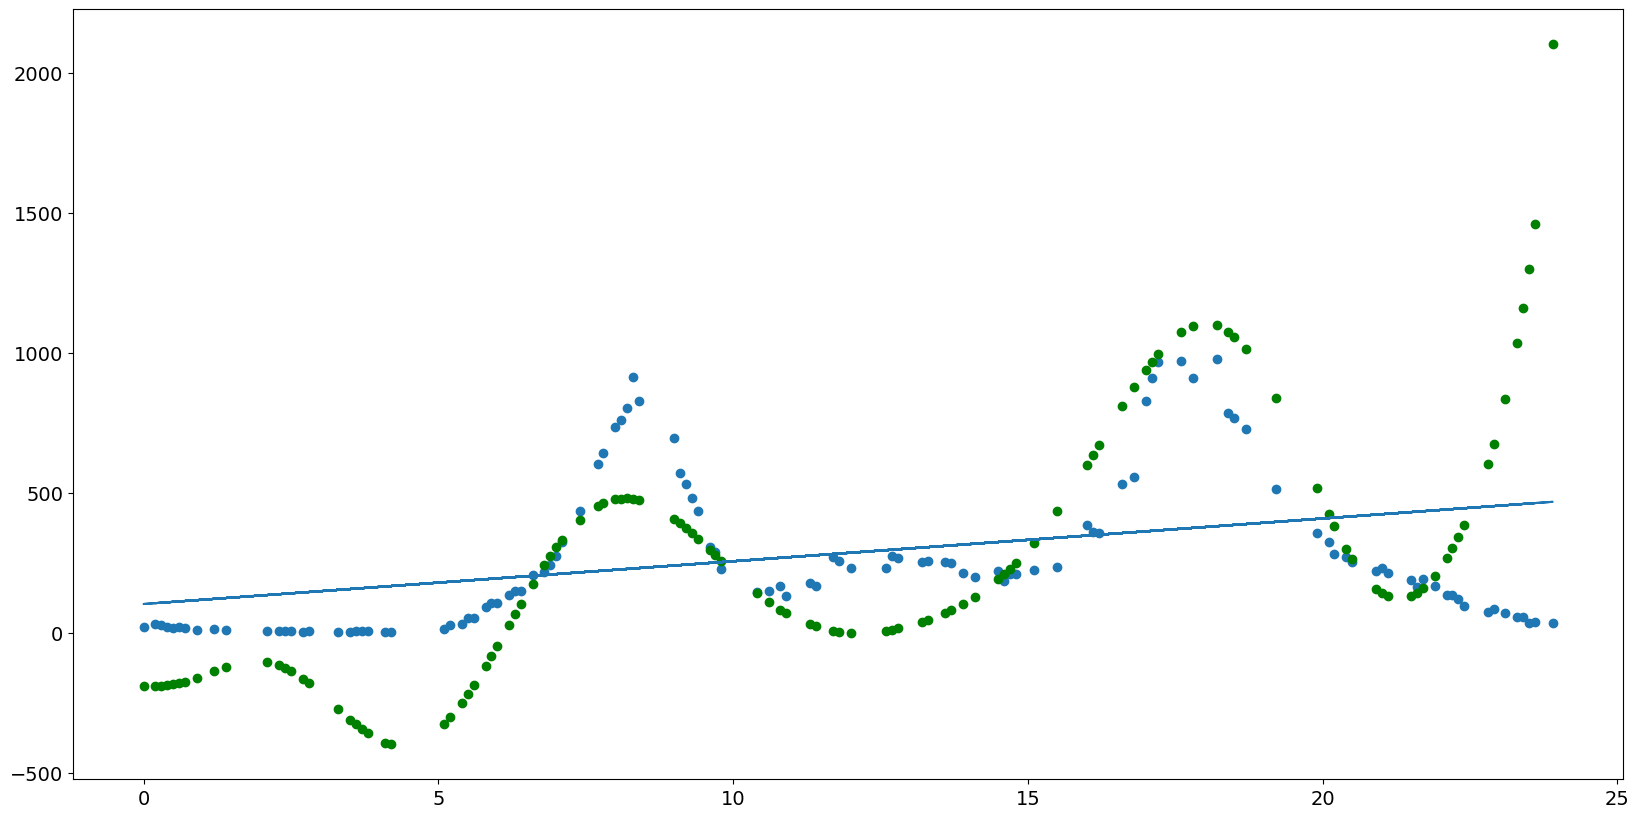

In [199]:
plt.scatter(x_mtest,y_mtest)
plt.plot(x_mtest, np.dot(x_mtest, model.coef_) + model.intercept_)
plt.scatter(x_mtest, np.dot(x_15, ridge_poly.coef_.T) + ridge_poly.intercept_, c="green")

## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classification Report

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14
import pandas as pd

In [201]:
df = pd.read_csv('abalone.data', index_col=False, names=['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings'])
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


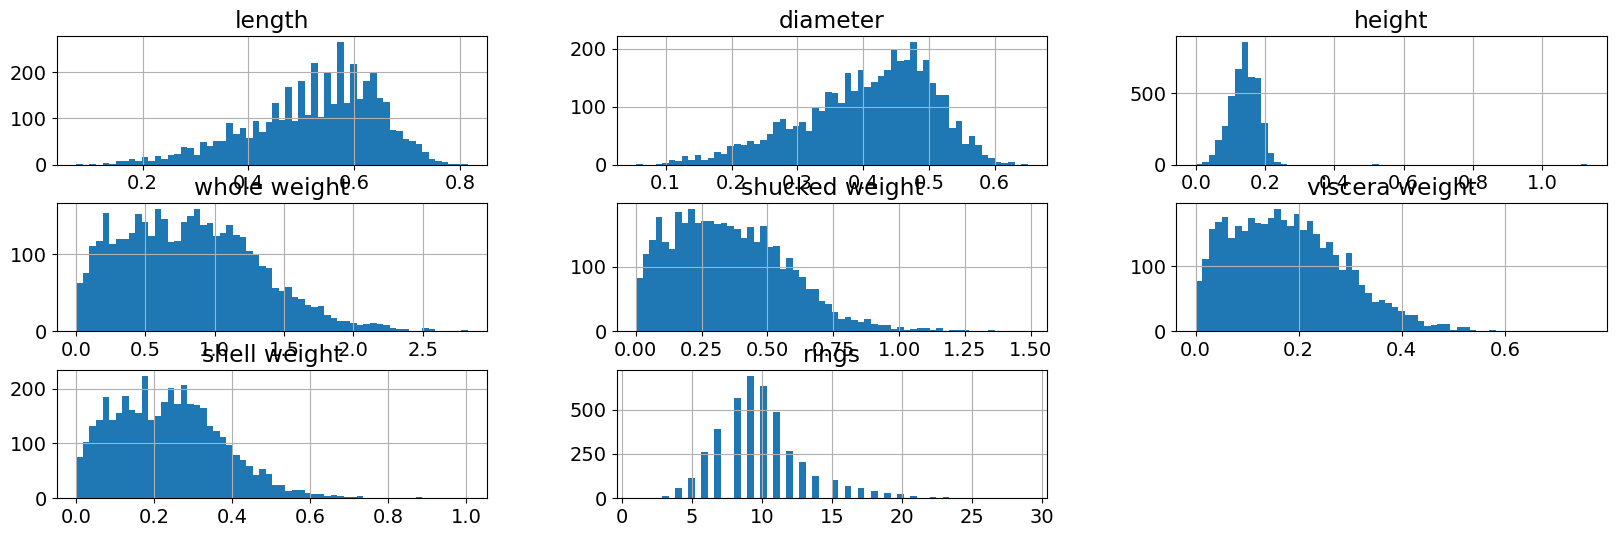

In [202]:
#review dataset
df.hist(bins=60)
plt.show()

In [203]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [204]:
# remove NA and nont numeric columns
df = df.dropna()
df = df.drop('sex', axis=1)
df

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [205]:
df['rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [206]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((3341, 8), (836, 8))

In [207]:
test.rings.value_counts()

9     140
8     128
10    114
11    109
7      88
12     52
6      38
13     35
14     27
5      24
15     22
17     13
18      9
4       9
16      8
19      8
20      5
3       2
21      2
24      1
26      1
27      1
Name: rings, dtype: int64

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
model = DecisionTreeClassifier(criterion='entropy')

In [210]:
#df.drop(['rings'], axis=1)
model.fit(df.drop(['rings'], axis=1), df.rings)

DecisionTreeClassifier(criterion='entropy')

In [211]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['rings'], axis=1),df.rings, test_size=.20)
df.shape, x_train.shape, x_test.shape

((4177, 8), (3341, 7), (836, 7))

In [212]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [213]:
test_pred = model.predict(x_test)

In [214]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [215]:
accuracy_score(y_test, test_pred)

0.18779904306220097

In [216]:
confusion_matrix(y_test, test_pred)

array([[ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  8,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  5,  6,  3,  5,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5, 15, 12,  9,  5,  2,  2,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2, 15, 24, 23, 13,  4,  1,  2,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  7, 15, 26, 24, 18,  4,  4,  4,  2,  2,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  6, 16, 22, 37, 24, 17,  9,  6,  8,  1,  1,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  3, 22, 36, 24, 20, 11,  6,  5,  7,  2,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4, 11, 19, 20, 12,  8,  5,  5,  2,  2,  3,  1,
         0,  0,  0,  0, 

In [217]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       0.25      0.17      0.20        12
           5       0.23      0.27      0.25        22
           6       0.29      0.29      0.29        51
           7       0.28      0.28      0.28        86
           8       0.21      0.24      0.22       110
           9       0.23      0.25      0.24       148
          10       0.21      0.17      0.19       139
          11       0.14      0.13      0.14        92
          12       0.08      0.08      0.08        53
          13       0.05      0.08      0.06        26
          14       0.07      0.09      0.08        22
          15       0.06      0.05      0.05        19
          16       0.00      0.00      0.00        19
          17       0.09      0.12      0.11         8
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         4
          20       0.00    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)